### Intro

We are Ronen lubin (322702275) and Osher Baron (123456789), young computer science students who are passionate about data science.
Since we both like realestate we knew from the beginning of the semester that our project would deal with this topic


### The problem

A lot of people struggle with the question of how much their house is worth
and how much the house will be worth in the future.

We have decided to put an end to this problem for those living in israel

# Obtaininng the data
Our data source for this project is a israeli realestate website called 'ad',
you can go visit the website : https://www.ad.co.il/nadlansale
there are tens of thousands of homes for sale in the website and equal amount of rental apartments .
The website does not provide an API for obtaininng the data on the homes,
so we had to build a web scraping tool in order to obtain the information.


#### Building the web scraping tool
We used the beautifulsoup python package for this mission.

The first part of the scrapper is browsing in the first 1200 pages of homes for sale in the website.
For each main page the code extracts the links to the house info,
there are 48 links in each page so in total the method 'get_all_links' return 57600 homes info links.

#### Extracting the data from the html content
For each link from the 57600 links we extract the data on the house that the link describes.
The data includes the city and the neighborhood where the house is located, the price of the house in the website, the area of the house and the gardan in sqr m, 
the type of the house, the number of rooms in the house, the number of balconies in the house, whether the house contain bars, whether the house contains furniture, whether there is an elvator in the building, if the is a parking nearby and if air condition is insalled indside the house and so on ( 18 different attirbutes in total ).


#### Writing the data to csv file
After we scrapped the info about the homes we sould write it into a csv file, in order to use the informatiom in the future.   
the code down below acomplish this mission:

In the next section we show only the last part of the scraping tool,
if you are eager to see the full code for the web scrapper you can check the next link: https://github.com/ronen7822/real-estate-project

In [ ]:
import csv
import time
from apartment import get_apartments

# the names of the columns in the csv file
head_line = ['city', 'neighborhood', 'price', 'house type', 'house_area', 'garden_area', 'rooms', 'balconies',
             'air_condition', 'parking', 'protected_room', 'elevator', 'sun_balcony', 'renovated', 'furniture',
             'accessibility', 'bars', 'storage']


# return row to write in the csv file
def get_row(apartment):
    row = [apartment.city, apartment.neighborhood, apartment.price, apartment.house_type, apartment.house_area,
           apartment.garden_area, apartment.rooms, apartment.balconies, apartment.air_condition, apartment.parking,
           apartment.protected_room, apartment.elevator, apartment.sun_balcony, apartment.renovated, apartment.furniture,
           apartment.accessibility, apartment.bars, apartment.storage]
    return row


# writes the apartments data to the csv file
def write_to_csv():
    apartments_data = get_apartments()

    with open('apartments.csv', "w", newline='', encoding="utf-8") as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(head_line)

        for apartment in apartments_data:
            csv_writer.writerow(get_row(apartment))


# measure the run time of the program
start_time = time.time()
write_to_csv()
print(time.time() - start_time, "seconds")

#### Run Time
After testing a few runs in the real world we can say confidently that the web scrapper runs in O(N) time complexity (where N is the number of homes).
it took the program approximatly 9396 seconds (2 hours and 37 minutes) to complete the run on 57600 homes, and it took 77 seconds to complete the run on input of 480 homes. A little bit less then 1 second for 6 apartments on our setup.



# Exploratory Data Analysis

Now after we obtained the data lets export the data set into pandas data frame, and look what we got from the scrapping:

In [1]:
import pandas as pd

df = pd.read_csv("new_apartments.csv")
df

,city,neighborhood,price,house type,house_area,garden_area,rooms,balconies,air_condition,parking,protected_room,elevator,sun_balcony,renovated,furniture,accessibility,bars,storage
0,רמת ישי,אין,2950000,בניין מגורים,150,450,6.0,1,1,1,1,0,1,1,0,1,1,1
1,חדרה,גבעת אולגה,1910000,דירה,120,0,4.0,1,1,1,1,1,1,1,1,1,0,0
2,קרית גת,שער הדרום,800000,דירה,80,0,3.0,0,0,0,0,1,0,0,1,1,0,0
3,אשדוד,רובע ב,1040000,דירה,70,0,3.0,0,1,0,1,0,0,1,1,0,1,0
4,תל אביב יפו,צפון יפו,3450000,דירה,75,0,3.0,1,1,1,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57595,באר שבע,נווה מנחם,1360000,דירה,120,0,4.0,1,1,1,1,1,1,0,0,0,1,0
57596,קרית שמונה,אין,650000,דירה,90,0,3.0,0,1,1,0,0,0,1,1,0,0,1
57597,בת ים,רמת הנשיא,1450000,דירה,80,0,3.5,0,1,0,0,0,0,0,0,0,1,0
57598,נווה אילן,אין,7700000,פרטי/קוטג,500,500,12.0,1,1,1,1,0,1,1,1,1,1,1


As you can see there were no exeptions in  run time hence we have all 57600 rows as we expected.


## Cleaning the data
In this section we clear the raw data in order to use it later for visiulision and as an input for the training of the AI.

Firstly we will drop all rows that contain one or more Nan values:

In [2]:
df = df.dropna()

Now lets see if we have duplictate rows in our data set:

In [3]:
df[df.duplicated()].shape[0]

588

We have 588 duplicated rows, so lets get rid of them.

In [4]:
df = df.drop_duplicates()

Now after we left with non duplicated and not Nan values lets see what values we have in the "house type" coulmn:

In [5]:
df['house type'].unique()

array(['בניין מגורים', 'דירה', 'דו משפחתי', 'דירת גן', 'בית פרטי/קוטג',
       'דופלקס', 'טריפלקס', 'גג/פנטהאוז', 'מגרשים', 'פרטי/קוטג',
       'דירת נופש', 'משק חקלאי/נחלה', 'יחידת דיור', 'דיור מוגן',
       'קב רכישה/ זכות לנכס', 'פרטי/קוטג&nbsp;', 'מרתף/פרטר',
       'דירה&nbsp;', 'גג/פנטהאוז&nbsp;', 'משק עזר', 'כללי', 'מחסן',
       'סטודיו/לופט', 'מגרשים&nbsp;', 'משק חקלאי/נחלה&nbsp;',
       'מרתף/פרטר&nbsp;', 'חניה', 'מכירה לחדרה ב(תיווך)', 'דופלקס&nbsp;',
       'דו משפחתי&nbsp;', 'דירת גן&nbsp;', 'בניין מגורים&nbsp;'],
      dtype=object)

We do not want all the different house types in our data set because not all of them are relevant to our project,
lets get rid of the house types that we dont want in our data

In [6]:
types_to_keep = ['דירה', 'דו משפחתי', 'דירת גן', 'בית פרטי/קוטג', 'גג/פנטהאוז', 'פרטי/קוטג', 'דופלקס', 'דו משפחתי', 'טריפלקס']

df = df[df['house type'].isin(types_to_keep)]

Lets see the house type values we left with:

In [7]:
df['house type'].unique()

array(['דירה', 'דו משפחתי', 'דירת גן', 'בית פרטי/קוטג', 'דופלקס',
       'טריפלקס', 'גג/פנטהאוז', 'פרטי/קוטג'], dtype=object)

Now after we filterd out the unwanted house types from the data set, we want to drop the homes that are to small or to big.
We determine house to be to small if his area is lesser than 15m^2. house is to big if his area is greater than 650m^2.
We assume that the vast majorty of homes fall in in this catafory.

We performing filtering of the raw data because in the section of building a machine learning model the homes that fall to far apart from the mean value of price or area cause many problems, in happam for the reason that there are not enough edge cases in order to build prcies model for them.

In [8]:
not_to_small = df["house_area"] > 15
not_to_big = df["house_area"] < 650
garden_not_to_big = df["garden_area"] < 1000
garden_not_to_small = df["garden_area"] >= 0

df = df.where(not_to_small & not_to_big & garden_not_to_big & garden_not_to_small ).dropna()

Now lets filter homes that are to cheap or to much expensive and meet the criterion of reasonbale price per square meter.
on to of that we will drop homes with less than 2 rooms( homes with no seperate bedroom and living room) .

In [9]:
# homes that are between 200,00 and 15,000,000 shekels and reasonbale price per square meter
not_to_cheap = df["price"] > 200000
not_to_expensive= df["price"] < 15000000


df["price_per_square_meter"] = df["price"] /  df["house_area"]
not_to_expensive_for_squre_meter = df["price_per_square_meter"] < 100000
not_to_cheap_for_squre_meter = df["price_per_square_meter"] > 4000
df = df.where(not_to_cheap & not_to_expensive  & not_to_expensive_for_squre_meter  & not_to_cheap_for_squre_meter ).dropna()

# drop homes with less than 2 rooms or more than 10 rooms
not_to_little_rooms = df["rooms"] >= 2
not_to_many_rooms = df["rooms"] <= 10
df = df.where ( not_to_little_rooms & not_to_little_rooms ).dropna()

df = df.drop_duplicates()
df.shape[0]

48140

As you can see in the data frame above we left with only 48140  homes from the 57600 homes we began with.
in other words we filterd out 16.42% of the rows from the original dataset.

seaborn library does not handle the hebrew language very well,

hence we will replace all the hebew text  with plain english and then run the rest of our code.

In [10]:
# raplaceing 'house type' hebrew with english
list_to_replace = ['דירה', 'דו משפחתי', 'דירת גן', 'בית פרטי/קוטג', 'דופלקס','טריפלקס', 'גג/פנטהאוז', 'פרטי/קוטג']
replce_with = ['apartment', 'daul faimly', 'garden apartment', 'private house', 'duplex', 'triplex', 'penthouse', 'private house']
df = df.replace(to_replace =list_to_replace, value =replce_with)

df.head()

,city,neighborhood,price,house type,house_area,garden_area,rooms,balconies,air_condition,parking,protected_room,elevator,sun_balcony,renovated,furniture,accessibility,bars,storage,price_per_square_meter
1,חדרה,גבעת אולגה,1910000.0,apartment,120.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,15916.666667
2,קרית גת,שער הדרום,800000.0,apartment,80.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,10000.000000
3,אשדוד,רובע ב,1040000.0,apartment,70.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,14857.142857
4,תל אביב יפו,צפון יפו,3450000.0,apartment,75.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,46000.000000
5,רמת השרון,מורשה,5250000.0,daul faimly,130.0,537.0,6.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,40384.615385


Lets use google translator API to translate the city name from hebrew to english.

We using an API because threre are to many different values to do it manually ( in oreder to install the API you have to go to anaconda prompt and write threre:  pip install googletrans==3.1.0a0  and the restart the Jupyter notebook ).

First, lets translate the names of the 20'st most popular cities from hebrew to english

In [11]:
# 20'st most popular cities in df
cities_hebrew = df['city'].value_counts().index.tolist()[0:20]

import googletrans
from googletrans import Translator

translator = Translator()
cities_english = []

for city_hebrew in cities_hebrew:
    city_english = translator.translate(city_hebrew, src='he', dest='en')
    cities_english.append(city_english.text)

Now lets raplace the hebrew names with the english names

In [12]:
df = df.replace(to_replace = cities_hebrew, value = cities_english)
df.head()

,city,neighborhood,price,house type,house_area,garden_area,rooms,balconies,air_condition,parking,protected_room,elevator,sun_balcony,renovated,furniture,accessibility,bars,storage,price_per_square_meter
1,Hadera,גבעת אולגה,1910000.0,apartment,120.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,15916.666667
2,קרית גת,שער הדרום,800000.0,apartment,80.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,10000.000000
3,Ashdod,רובע ב,1040000.0,apartment,70.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,14857.142857
4,Tel Aviv Jaffa,צפון יפו,3450000.0,apartment,75.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,46000.000000
5,רמת השרון,מורשה,5250000.0,daul faimly,130.0,537.0,6.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,40384.615385


Now, almost all of our data appear in english apart from unpopular cities and neighborhoods , it will not be a problem because we will keep only the 10 most popular cities down the road.

## Visualising The Data
Lets plot a few graphs in order to see what does the data set can reveal to us.

We have to inmport some external labrieris such as matplotlib and seaborn in order to visualise the data.

Firts we have histogram of the prices of all the homes in the data frame.

Text(0.5, 1.0, 'Home Price: $\\mu=2473360$, $\\sigma=1927512$')

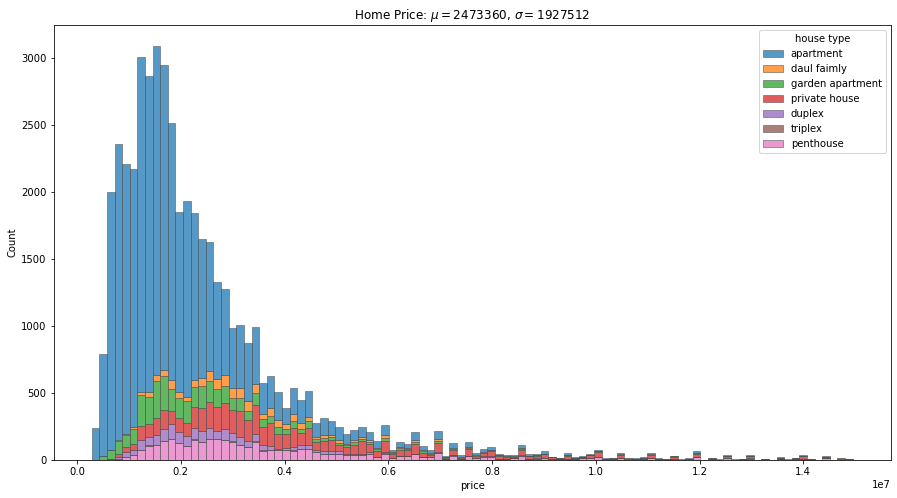

In [13]:
import matplotlib.pyplot as plt; 
import numpy as np
import seaborn as sns

plt.figure(figsize=(15,8))
sns.histplot( df, x="price", hue="house type", multiple="stack", palette="tab10", edgecolor=".3", linewidth=.5, bins = 100 )

# get the mean and the standard devation value of home price
mean = df['price'].mean()
std =  df['price'].std()
plt.title(r'Home Price: $\mu='+str(round(mean))+'$, $\sigma=' +str(round(std))+'$')

As you can see the mean house price is about 2,500,000 ₪ ( we are in 10^7 scale on the x axis).
We can also identify that tha vast majorty of homes cost less than 5 milion shekels.

The amount of of homes that cost 200,000 ₪ is very low as the price goes up the amount of homes increase rapidly until it picks in 2,500,000 ₪ then it decrease exponentially until there are virtualy no homes that cost more than 10 milion ( it follows log normal distribution https://en.wikipedia.org/wiki/Log-normal_distribution ).


now, lets plot the histogram of home size:

Text(0.5, 1.0, 'Home size: $\\mu=141$, $\\sigma=97$')

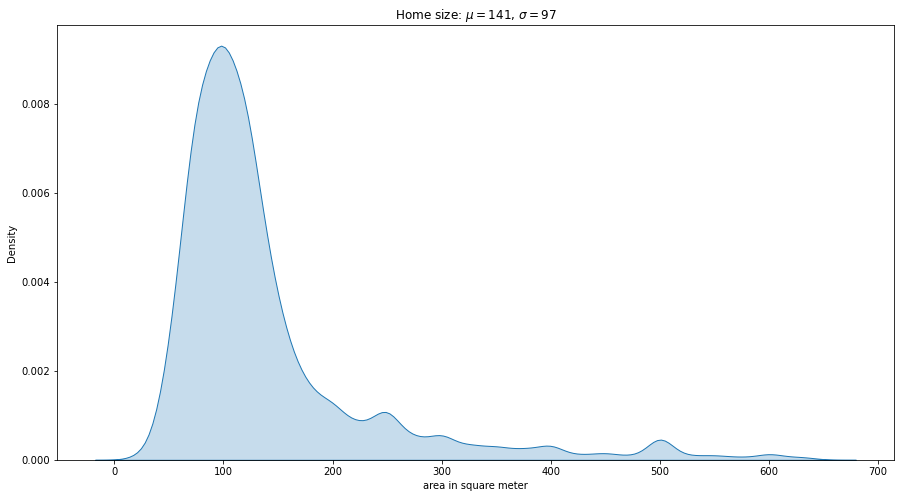

In [14]:
plt.figure(figsize=(15,8))
sns.kdeplot(df.house_area,  shade=True)
plt.xlabel('area in square meter')

mean = df['house_area'].mean()
std =  df['house_area'].std()
plt.title(r'Home size: $\mu='+str(round(mean))+'$, $\sigma=' +str(round(std))+'$')

As you can see the mean house size is 143 squre meter.
The distribution is similar to Gaussian distribution with μ = 143 and σ = 101.
We can explain the spikes in the plot in the reason that most people tend to round their homes size when they are put their house for sale. 


Lets draw plot that shows the correlation between home size and home pirce.

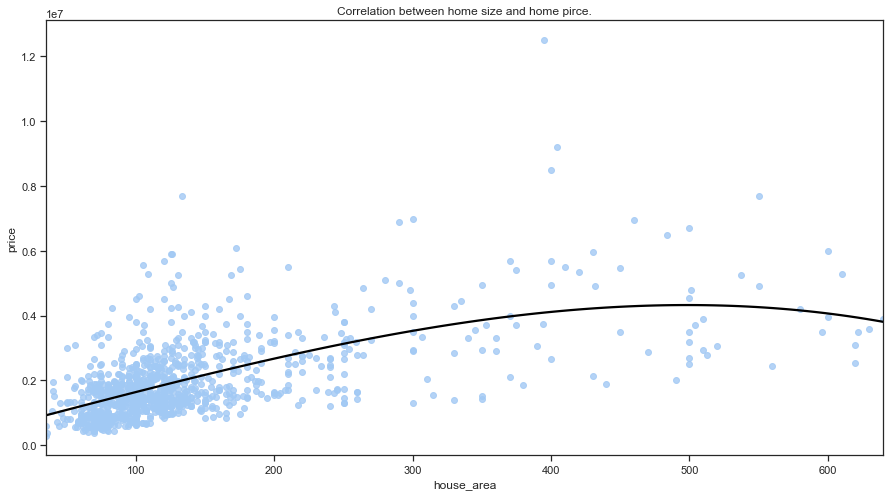

In [99]:
plt.figure(figsize=(15,8))

plt.title('Correlation between home size and home pirce.')
df_temp = df.head(1000)

ax = sns.regplot(x="house_area", y="price", data=df_temp, 
                 line_kws={"color": "black"},
                 order=3, ci=None)


As you can see when the house area is small than increase in the size correlate strongly with increase in price but as the area becomes bigger the affect fades away and when the area hits 400 square meters we can see almost no correlation between home size and home pirce.

Now it will be intersting to see whether bigger homes are cost more per squre meter than small homes in regard to different house tpyes, we gonna drop the apartments from the data set in oreder to see the other homes types more clearly.

<AxesSubplot:xlabel='house_area', ylabel='price_per_square_meter'>

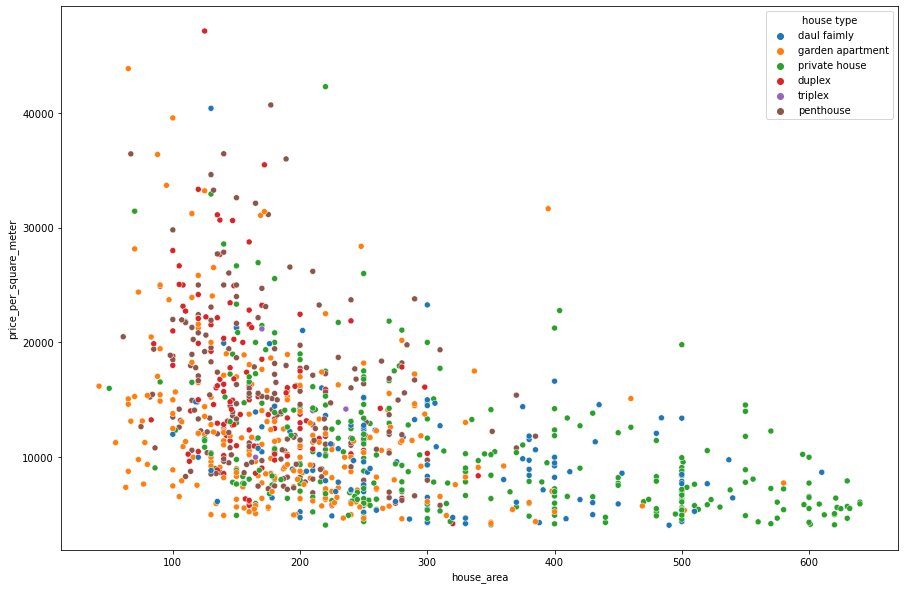

In [20]:
df_temp = df.where(df["house type"] != "apartment" ).dropna()
df_temp = df.where(df_temp["price_per_square_meter"] < 50000 ).dropna()
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df_temp.head(1000), x="house_area", y="price_per_square_meter",hue="house type")

Surprisingly we can see from the plot that bigger homes tend to cost less per square meter than small homes.

Okay, how does size correlate with rooms number?

In [ ]:
plt.figure(figsize=(15,8))
sns.kdeplot(
    data=df,  x="house_area",  y="rooms",
    fill=True, thresh=0, levels=20, cmap="mako",
)

plt.title('frequency of homes by area and number of rooms.')

We can learn few of things from this plot, but first we have to understand what the plot means:

Brighter colour stands for more common accurence ( for example we can see that 4 room  100 square meter homes is the brighest point in the plot).

First almost all the homes are betweem 2 and 6 rooms and betweem 30 to 250 square meter, seconds we can see almost linear correlation between the area of the house and it number of rooms (in fact correlation of 0.64 ), on top of that for each room number the varition of area is about 50 squere meters ( if you now that the home contains 4 rooms you can say confidently that the size of the house is around 70 to 170 square meters ). 



Lets look on the connection between house size the number of rooms in the hous and his price:

Text(0.5, 0.92, 'Correlation between home size, number of rooms and pirce.')

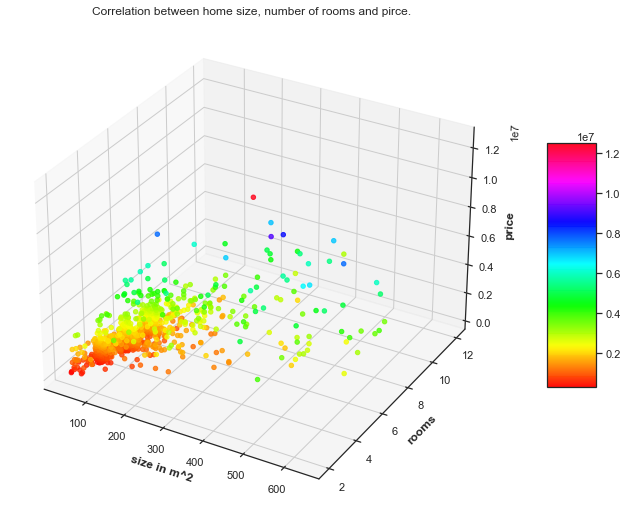

In [82]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (18, 9))
ax = plt.axes(projection ="3d")

my_cmap = plt.get_cmap('hsv')

x = df_temp["house_area"]
y = df_temp["rooms"]
z = df_temp["price"]
sctt = ax.scatter3D(x, y, z, cmap = my_cmap, c = z ,alpha = 0.8 )


ax.set_xlabel('size in m^2', fontweight ='bold')
ax.set_ylabel('rooms', fontweight ='bold')
ax.set_zlabel('price', fontweight ='bold')

fig.colorbar(sctt, ax = ax, shrink = 0.5,  aspect = 5)
plt.title('Correlation between home size, number of rooms and pirce.')

As we can see there is strong correlation between the 3 varibales ( 0.47 between size and price, 0.42 between number of rooms and price and 0.64 between size and number of rooms).

lest draw a pie chart that describes the distribution of different house types

Text(0.5, 1.0, 'Distribution of different house types')

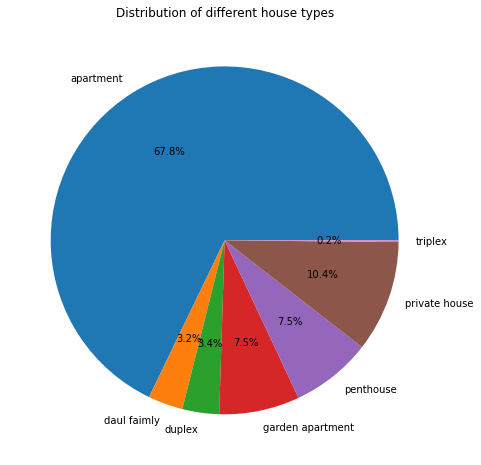

In [162]:
data = df.groupby("house type").count()
labels  = data.index.values.tolist()
data_list =  data['city'].tolist()

plt.figure(figsize=(15,8))
plt.pie(data_list, labels = labels, autopct='%.1f%%')
plt.title('Distribution of different house types')

We can learn from this chart that the vast majorty of homes up to sale are apartments (67.8%) in the second place by a large margin are private homes (10.4%) and we have a tie in the third place where gardan apartments and penthouse take each 7.5% of the market share.

as you can see the seaborn library does not handle the hebrew language very well,
hence we will replace all the hebew text in the 'house type' coulmn with plain english and then run the code again.

now it will be nice to see whether having elevator in your apartment affect the price of the apartment.

but first we have to sort out all the homes that not qualified as apartmens

Text(0.5, 1.0, 'Affect of elevator on aparments and penthouse prices')

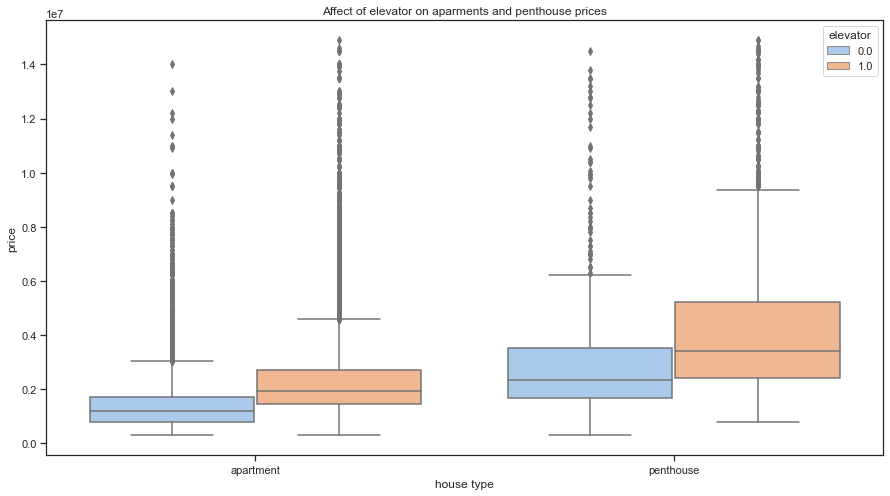

In [21]:
# filter where lift does matter  
apartment = df["house type"] == "apartment"
penthouse = df["house type"] == "penthouse"
apartments = df.where(apartment | penthouse ).dropna()

# drawing the plot
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(15,8))
sns.boxplot(x="house type", y="price",  hue="elevator", data=apartments)
plt.title('Affect of elevator on aparments and penthouse prices')

Lets explain how does box plot works: the line in the middle of the rectangle stands for the median velue, the upper edge of the rect stands for 75% and the lower edge stands for the 25'st precentile.
the upper bound stands for 2 standard devations from the mean ( 97.8% ) and the lower bound is for 2 standard devations down from the mean (2.2%) all the rest of the dots are outliers.

It is clear from the plot that exsiting of an elevator in the building corolate positivly with homes price,
we can see that apartments with elevator cost 0.5 million ₪ more the apartments without an elevator, and if look in penthouse the margin increase to about 1 million ₪.

in fact its make a lot of sence, in which apartment would you prefer to live apartment with an elevator of one without?

now lets look what about different house types with and without furniture:

Text(0.5, 1.0, 'Affect of furniture on different house types prices')

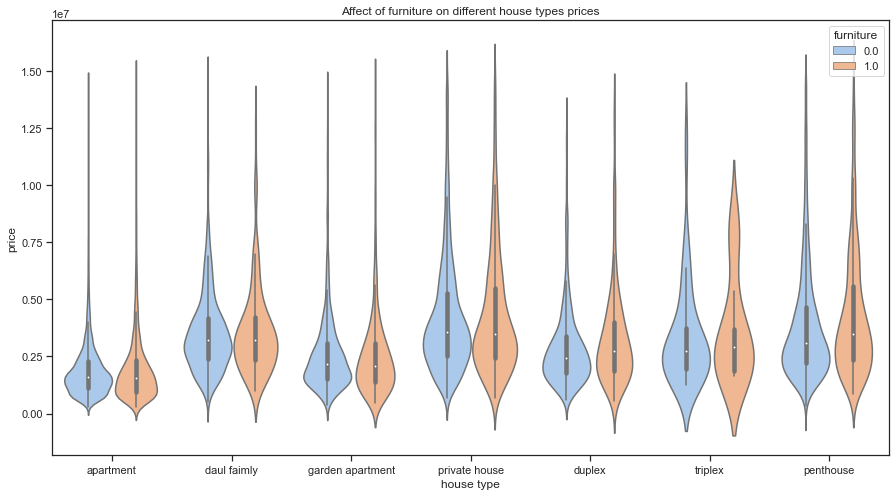

In [22]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(15,8))
sns.violinplot(x="house type", y="price",  hue="furniture", data=df)
plt.title('Affect of furniture on different house types prices')

Violin plot is similar in all sense to box plot, but in addition we can see the frequency of the Y axis ( price in our plot).

It is clear from the plot thatt here is no clear visible correlation between absence of furniture in the house and it price (it is ture in regard to all the house types in data set).

Lastly, what about having protected room in the house, does it affect the price of your home?

<AxesSubplot:xlabel='house type', ylabel='price'>

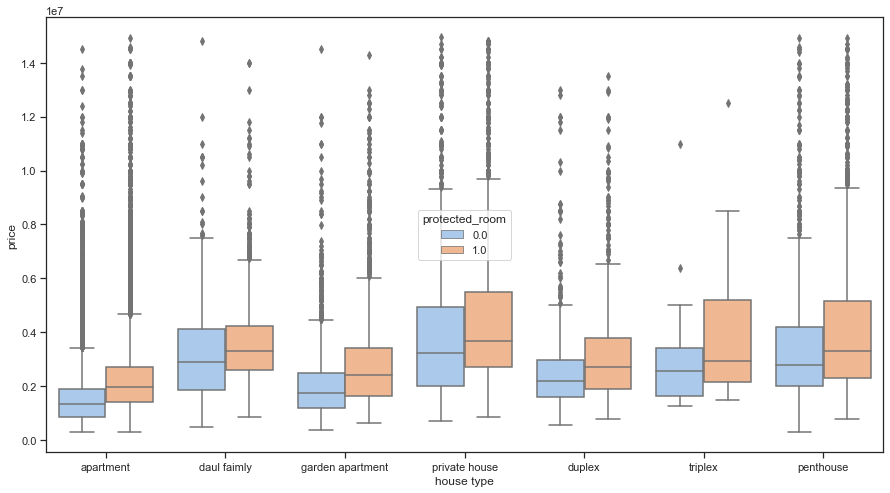

In [23]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(15,8))
sns.boxplot(x="house type", y="price",  hue="protected_room", data=df)

Now we can see clearly it is true in all cases that having protected room in the house corrolate positivly with the price of the house.

Lets look on the joint plot of price and garden area in private homes and gardan apartments:

C:\Users\Ronald\anaconda3\lib\site-packages\seaborn\distributions.py:1182: UserWarning: The following kwargs were not used by contour: 'aspect'
  cset = contour_func(


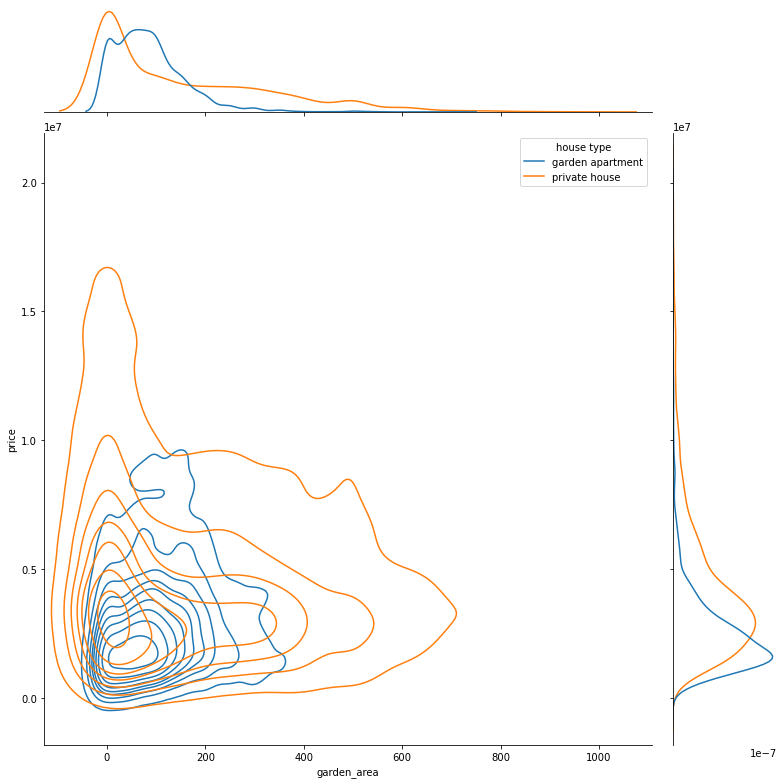

In [23]:
types_to_keep = ['private house', "garden apartment"]
homes_with_garden = df[df['house type'].isin(types_to_keep)]

sns.jointplot(data=homes_with_garden, x="garden_area",  y="price", hue="house type", kind="kde",
              height=11, aspect=11.7/8.27)

We can see no signficate correlation between garden area and price, homes with larger garden tend to be a little bit more expensive than home with smaller garden both whan looking gardan aparments and private homes.

We can also learn that private homes has much more veraiton in the gardan area than garden apartments, but all in all if we look on the average garden area it almost identical between the 2 catgories.


## Finding Correlations
We mentioned the word correlation several times so far but we not yet looked on the correlation matrix.
lets found the correlations of the numeric values in our data set:

before we find correlation we have to drop the 'price per square meter' coulmn because it does not an independent varibale.

<AxesSubplot:>

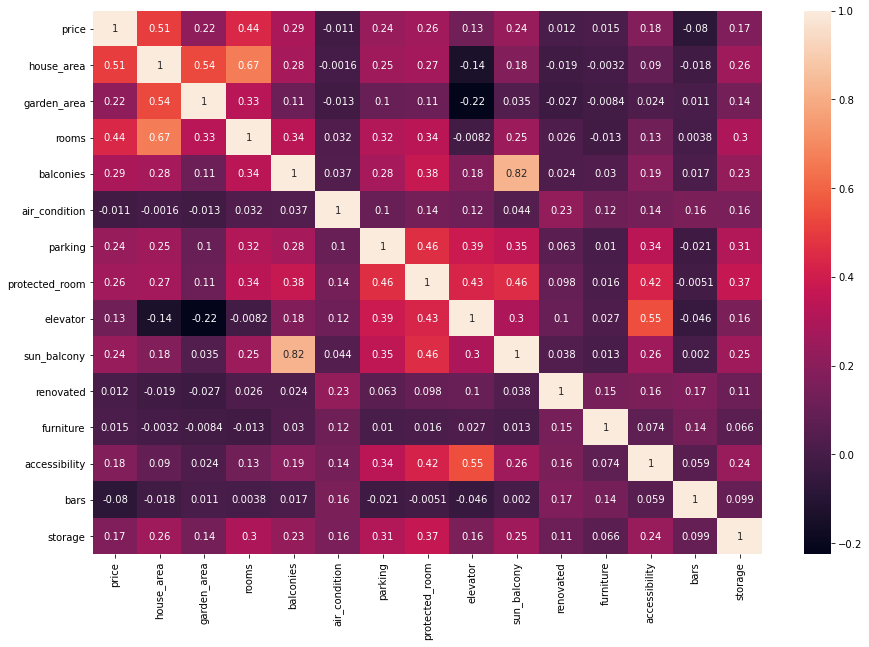

In [14]:
df = df.drop(['price_per_square_meter'], axis=1)


corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

As you can see the highest correlation between price and other numeric parmater is area. but still correlation of 0.51 is consiederd quite strong correlation,but area alone does not disclose the full pictue so how we explain this?

As we already said we only took into calculation the numeric parmaters, but 'city' and 'neighborhood' are not numeric and we know that they are among the crucial parmaters when determing house price.

###  Back to visiulistion
In order to to observe how the city affect on the other varibles we have to isolate the city attirbue because ther are to many different cities in out dataset(380).
lets look on the 10 most frequent cities to apear in our data set

In [22]:
ten_most_popular_cities = df['city'].value_counts().index.tolist()[0:10]
ten_most_popular_cities

['Tel Aviv Jaffa',
 'Jerusalem',
 'Haifa',
 'Beer Sheva',
 'Netanya',
 'Ashdod',
 'Rishon Lezion',
 'Ashkelon',
 'Petah Tiqwa',
 'Ramat Gan']

now lets build new data frame consists only of the most popular cities

In [23]:
df_popular_cities = df[df['city'].isin(ten_most_popular_cities)]

df_popular_cities.head()

,city,neighborhood,price,house type,house_area,garden_area,rooms,balconies,air_condition,parking,protected_room,elevator,sun_balcony,renovated,furniture,accessibility,bars,storage
3,Ashdod,רובע ב,1040000.0,apartment,70.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,Tel Aviv Jaffa,צפון יפו,3450000.0,apartment,75.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
12,Rishon Lezion,רמז,2990000.0,duplex,135.0,0.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
13,Petah Tiqwa,משכנות גנים וקרית הרב סלומון,1850000.0,apartment,110.0,0.0,5.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
14,Ramat Gan,הבורסה,3250000.0,apartment,108.0,0.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0


lets see what is the average home price in each city

Text(0.5, 1.0, 'average price by city')

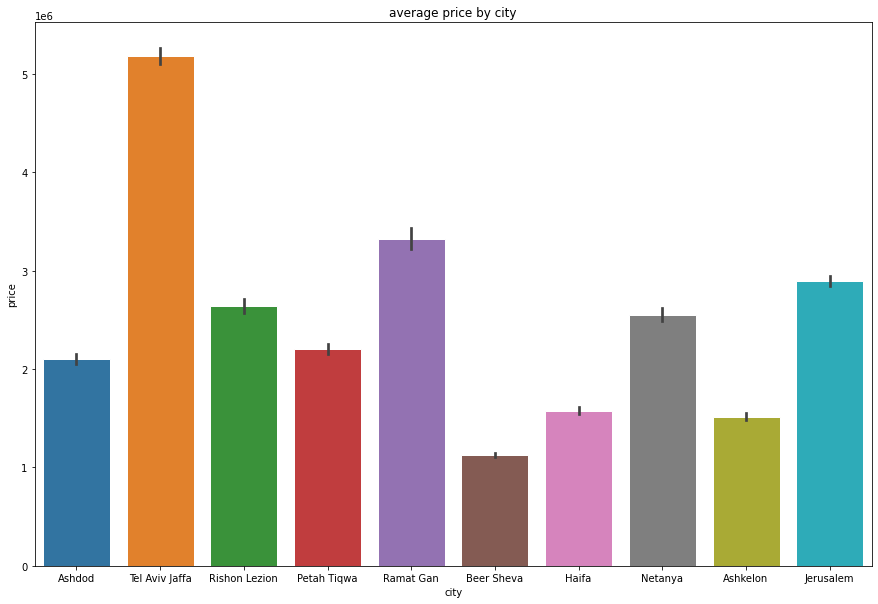

In [24]:
plt.figure(figsize=(15, 10))
sns.barplot(x = 'city', y = 'price' , data = df_popular_cities, edgecolor = 'w').set_title('average price by city')

we can see that the average price of house in the mose expensive city tel aviv the is almost 5.5 milion shekels.
while the price in the cheapest city in our list (beer shave) is around 1.1 milion shekels.

Now lets look on average price for squre meter by city and house type.
for this we first have to find the average price and the average size for each city.

Text(0.5, 1.0, 'average price for squre meter by city and house type')

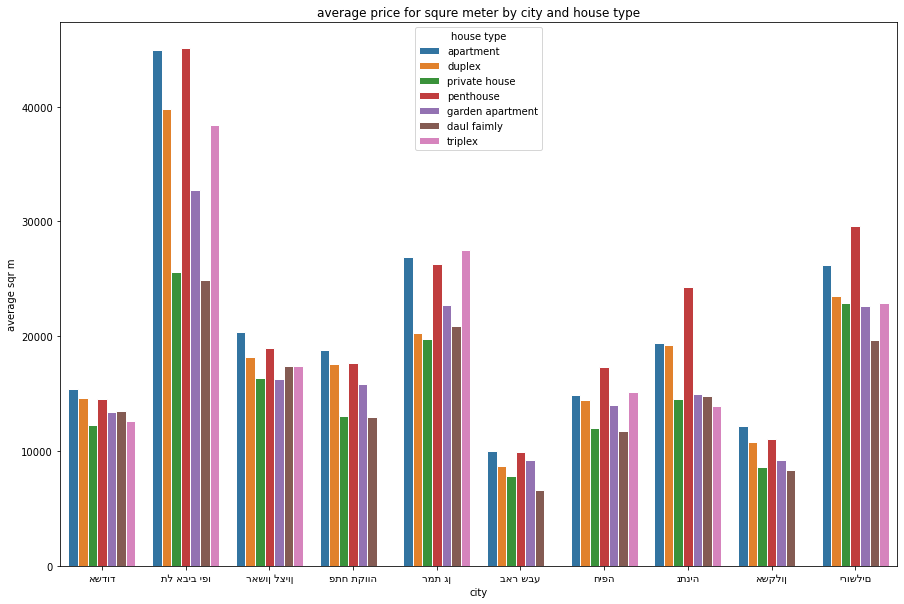

In [17]:
#founfing average size and average price
average_area = df_popular_cities.groupby(['city','house type'])["house_area"].mean()
average_area = average_area.to_frame()
average_area.columns = ['average area']

average_price = df_popular_cities.groupby(['city','house type'])["price"].mean()
average_price = average_price.to_frame()
average_price.columns = ['average price']

# merging
df_avg = pd.merge(average_price,average_area,on=['city','house type'])
df_popular_cities = pd.merge(df_popular_cities, df_avg, on=['city','house type'])
df_popular_cities["average sqr m"] =df_popular_cities["average price"] / df_popular_cities["average area"]

#ploting
plt.figure(figsize=(15, 10))
sns.barplot(x = 'city', y = 'average sqr m' , hue = "house type", data = df_popular_cities, edgecolor = 'w').set_title('average price for squre meter by city and house type')

The most expensive homes in price per square meter are penthouse in tel aviv ( 48,000 shekel for meter ) and the cheapest homes are dual faimly homes in beer sheva ( 6000 shekels per square meter ).

It is inetesing to see that in all the cities penthouse are among the more expensive homes while dual fimaly are among the cheapest home in price per square meter.

we know that parking is scarce in tel aviv, can we see it in our data?

Text(0, 0.5, 'Relative frequency')

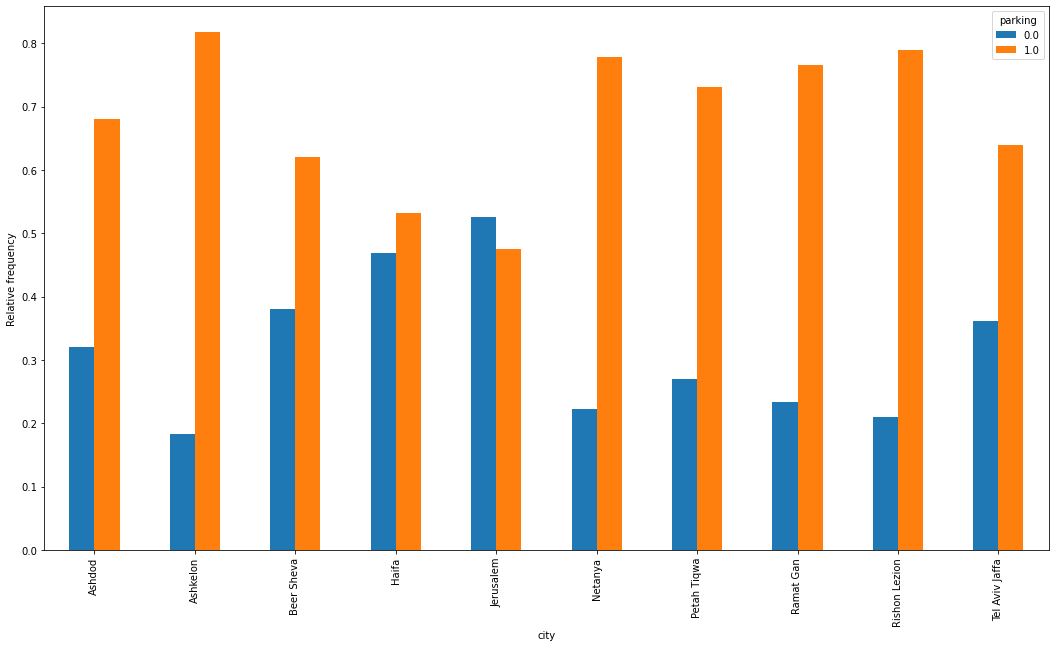

In [20]:
cross_tab =  pd.crosstab(df_popular_cities["city"], df_popular_cities["parking"], normalize ='index' )
cross_tab.plot(kind = 'bar', figsize=(18, 10))
plt.ylabel("Relative frequency")

Surprisingly only 35% of homes for sale in Tel Aviv does not have parking (we expected for more homes without parking), the highest precentage for homes without parking found  in jurasalem (53%).

now, lets look how having an air condition in your house its price:

<AxesSubplot:xlabel='city', ylabel='price'>

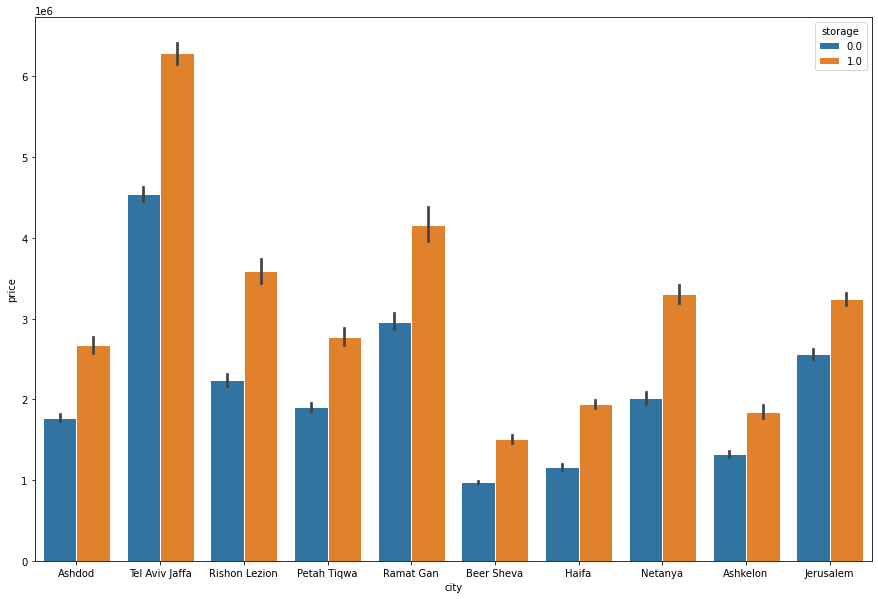

In [21]:
plt.figure(figsize=(15, 10))
sns.barplot(x = 'city', y = 'price', hue ='storage', data = df_popular_cities, edgecolor = 'w')

It seems that homes with out an air condition tend to be about 25% cheaper than homes an with air condition installed, this can be seen across all cities.

Lets look on neigberhoods in order to do this we naturaly have to look on specific city so we going to choose the most popular city in our data set : Tel Aviv.

In [115]:
tel_aviv = df.where( df["city"] == "Tel Aviv Jaffa").dropna()
ten_most_popular_hoods = tel_aviv['neighborhood'].value_counts().index.tolist()[0:10]
tel_aviv_popular_hoods = tel_aviv[tel_aviv['neighborhood'].isin(ten_most_popular_hoods)]
tel_aviv_popular_hoods.head()

,city,neighborhood,price,house type,house_area,garden_area,rooms,balconies,air_condition,parking,protected_room,elevator,sun_balcony,renovated,furniture,accessibility,bars,storage
279,Tel Aviv Jaffa,הקריה,3000000.0,apartment,50.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
319,Tel Aviv Jaffa,רמת אביב ג,3950000.0,apartment,95.0,0.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
531,Tel Aviv Jaffa,פלורנטין,1960000.0,apartment,40.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547,Tel Aviv Jaffa,הקריה,4600000.0,apartment,102.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
761,Tel Aviv Jaffa,הצפון החדש סביבת ככר המדינה,5550000.0,apartment,105.0,0.0,4.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


We have 2015 rows, but the neigborhoods appear in hebrew so lets translate them into english.

then lets show the avarge price in each neigborhood in tel aviv:

In [19]:
# translate from hebrew to english the neigberhoods names
ten_most_popular_hoods 

translator = Translator()
neigborhoods_english = []

for neigborhood in ten_most_popular_hoods:
    neigborhood_english = translator.translate(neigborhood, src='he', dest='en')
    neigborhoods_english.append(neigborhood_english.text)
    
tel_aviv_popular_hoods = tel_aviv_popular_hoods.replace(to_replace = ten_most_popular_hoods, value = neigborhoods_english)

Text(0.5, 1.0, 'average price by neighborhood in Tel Aviv')

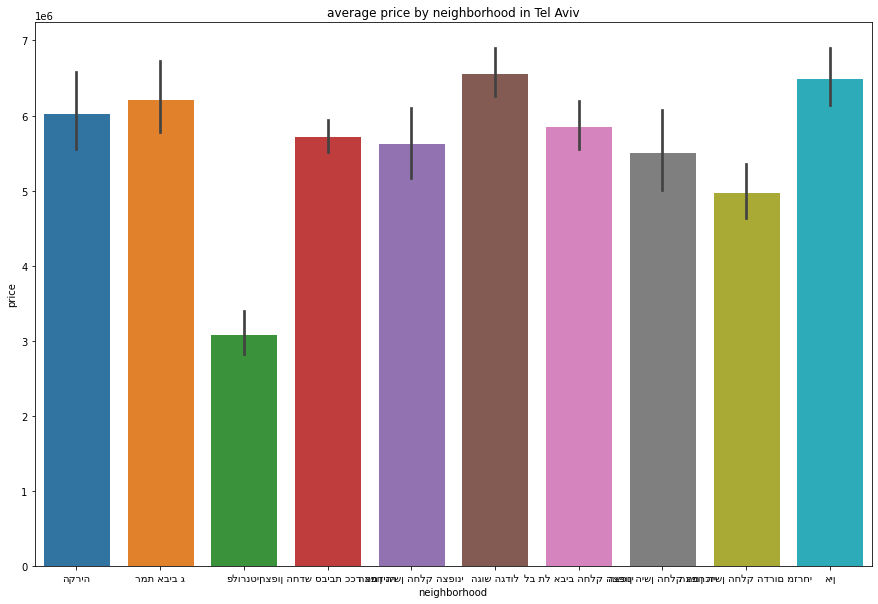

In [24]:
plt.figure(figsize=(15, 10))
sns.barplot(x = 'neighborhood', y = 'price', data = tel_aviv_popular_hoods, edgecolor = 'w').set_title('average price by neighborhood in Tel Aviv')

As you can see Tel aviv is expensive across the board, in the cheapest neigberhood average house cost 3.1 million shekels while in the most expensive neigberhood average house cost 6.8 million.

## PCA
Lets use PCA techniqe to reduce the diminstion of our data set in order to simplfy building the AI model down the road.

first, lets drop non numeric values from the dataset, and lets seperate the features from the target varibales, and normalize the features varibales.

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_temp = df.drop(['city', 'neighborhood', 'house type'], axis = 1) 
classes = df_temp['price'].reset_index(drop=True)

features = df_temp.drop(['price'], axis = 1) 
features_norm = StandardScaler().fit_transform(features)

Okay, now lets perform the PCA algorithm

In [27]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(features_norm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])
principalDf["price"] = classes

pca.explained_variance_ratio_ 

array([0.25659206, 0.14364147])

The numbers array([0.25785477, 0.14255974]) means that  25.79% of the variance in price can be explained by the first principal component and 14.26% of the variance in price can be explained by the second principal component.

We have seen that house area and number of rooms correlated with the price in 0.51 and 0.43 accordingly so it is surpising that the PCA method doesnt found singal linear component that explain the variance in price by more than 25.8% .

now we have to transfer the price value into discrit varibale in order to use as 'hue' in the scatter plot:

In [28]:
principalDf['pirce_bins'] = pd.cut(x=principalDf['price'], bins=[200000, 450000, 700000, 1000000, 1400000, 1900000, 2600000, 3500000, 4600000, 6200000, 15000000],
                    labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

principalDf.head()

,PC 1,PC 2,price,pirce_bins
0,1.308686,-1.753440,1910000.0,6
1,-2.321352,-0.837271,800000.0,3
2,-2.086857,-0.643296,1040000.0,4
3,0.250135,-1.410900,3450000.0,7
4,0.043358,5.059534,5250000.0,9


now after we perform PCA on our dataset and extracted 2 principal components lets draw a scatter plot that describes the connection between PC1, PC2 and the home price.

<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

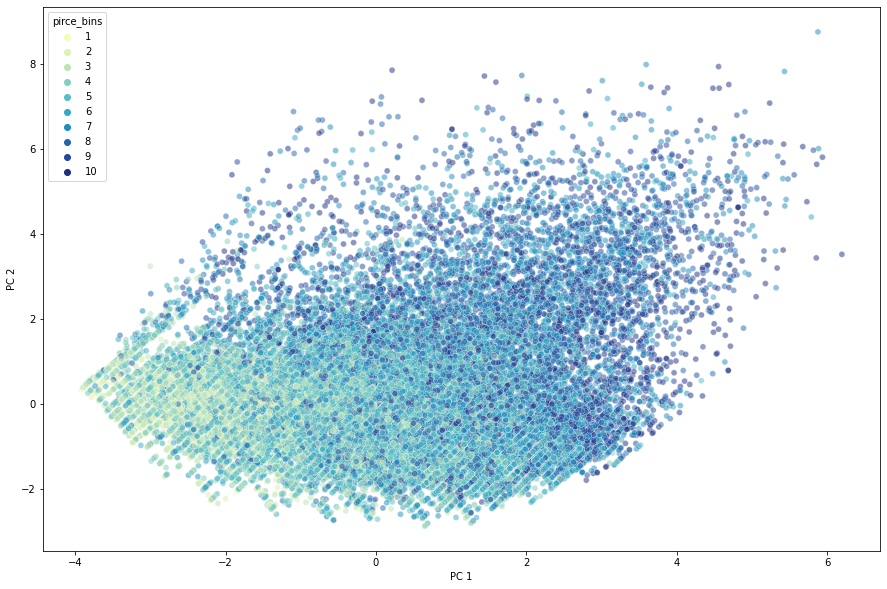

In [29]:
plt.figure(figsize=(15, 10))
sns.scatterplot( data=principalDf, x="PC 1", y="PC 2", hue="pirce_bins", palette="YlGnBu" , alpha = 0.5  )  

The PCA breakdown into 2 main Components can explain us the variance in price quite sucssesfully, 
we see a strog correlation between increase in PC 1 and PC 2 value to an increase in the price value (1 to 10). 

# Building model for predicting house price
after we explored the data we need to solve our inital problem: classifing a house price.

in oreder to achive this we have to build machine learning model, we will try to use varius types of regression models.

we will try to predict house price only in the 20 most popolur cities in our dataset ( and specificly only  the 20 most popolur neighborhoods in each city) beacuse we dont have enough data to build satisfying model for all the different cities and neighborhoods in our dataset.


In [180]:
ten_most_popular_cities = df['city'].value_counts().index.tolist()[0:20]
df_popular_cities = df[df['city'].isin(ten_most_popular_cities)]


# return data frame with 10 most popolur neighborhoods in the city
def find_10_most_popolur_hoods(city):
    # asolate the city
    df_city = df_popular_cities.where(df_popular_cities["city"] == city).dropna()
    # find the 10 most popolur neighborhoods in the city
    popolur_hoods = df_city['neighborhood'].value_counts().index.tolist()[0:20]
    df_city_popolur_hoods = df_city[df_city['neighborhood'].isin(popolur_hoods)]

    return df_city_popolur_hoods


frames = []
for city in ten_most_popular_cities:
    popolur_hoods_in_city = find_10_most_popolur_hoods(city)   
    frames.append(popolur_hoods_in_city)
    
df_popular_cities_popolur_hoods = pd.concat(frames)
df_popular_cities_popolur_hoods.reset_index(drop=True, inplace=True)

# print the dataframe
df_popular_cities_popolur_hoods

,city,neighborhood,price,house type,house_area,garden_area,rooms,balconies,air_condition,parking,protected_room,elevator,sun_balcony,renovated,furniture,accessibility,bars,storage
0,Tel Aviv Jaffa,אזורי חן,5300000.0,apartment,109.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1,Tel Aviv Jaffa,הקריה,3000000.0,apartment,50.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,Tel Aviv Jaffa,רמת אביב ג,3950000.0,apartment,95.0,0.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
3,Tel Aviv Jaffa,התקווה,2200000.0,private house,70.0,0.0,3.5,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,Tel Aviv Jaffa,פלורנטין,1960000.0,apartment,40.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27378,Raanana,אין,4980000.0,duplex,160.0,0.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
27379,Raanana,אין,3349000.0,garden apartment,157.0,0.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
27380,Raanana,אין,3200000.0,apartment,158.0,0.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
27381,Raanana,קרית שרת,2050000.0,apartment,91.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0


We will split the datasets to inputs and targets, the inputs are all the the indepndent variables such as ( house area, rooms ect... ) and the input is the dependent variable ( the price ).

In [164]:
inputs = df_popular_cities_popolur_hoods.drop(['price'],axis = 'columns')
target = df_popular_cities_popolur_hoods['price']

For the purpose of training a regression model on the data set we will convert this property so that it contains numerical values.

We will do this by adding another new property with numeric values that displays the neighborhood values using the indexing method, We will also remove from the original data set the characteristic of neighborhoods whose values are categorical
We will do the same process for the type of house type and city.

In [165]:
from sklearn import preprocessing

twenty_most_popular_cities = df_popular_cities_popolur_hoods['city'].value_counts().index.tolist()[0:20]
hosue_types = df_popular_cities_popolur_hoods['house type'].value_counts().index.tolist()[0:20]
neighborhoods = df_popular_cities_popolur_hoods['neighborhood']

cities_encoder = preprocessing.LabelEncoder()
cities_encoder.fit(twenty_most_popular_cities)

house_types_encoder = preprocessing.LabelEncoder()
house_types_encoder.fit(hosue_types)

neighborhood_encoder = preprocessing.LabelEncoder()
neighborhood_encoder.fit(neighborhoods)

inputs['neighborhood_n'] = neighborhood_encoder.transform(inputs['neighborhood'])
inputs['house type_n'] = house_types_encoder.transform(inputs['house type'])
inputs['city_n'] = cities_encoder.transform(inputs['city'])

inputs = inputs.drop(['neighborhood','house type', 'city'],axis = 'columns')


Let's look at our dataset now, the whole property contains only numeric values. So we can start training the model

In [166]:
inputs.head()

,house_area,garden_area,rooms,balconies,air_condition,parking,protected_room,elevator,sun_balcony,renovated,furniture,accessibility,bars,storage,neighborhood_n,house type_n,city_n
35,109.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,12,0,19
279,50.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,77,0,19
319,95.0,0.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,251,0,19
446,70.0,0.0,3.5,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,85,5,19
531,40.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192,0,19


## Training and Testing
First, each data set of the properties and the target variable is divided into two additional parts
The first part of each data set is called the training set and with it we will be training to the model
The second part of each data set is called the test set and with it we will test the model and its level of accuracy in predicting target variables of observations which have not been seen before.

In [167]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, target)

### Linear Regression
from sklearn.linear_model import LinearRegression
Our first model will be a Linear Regression ( x_train are the indepndent variables and y_train is the target variable)

In [168]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train,y_train)
LR.score(x_test,y_test)

0.49282017081248164

What does the output 0.572 means?

the output of the score method tell us how much of the variance in the target variable can be explained by the indepndent variables in the specific model ( as the number goes higher the model is considerd to be more accurate ).

###  SVR Regression 
As is customary in this field, training examples are represented as vectors in linear space. For classification problems, in the training phase appropriate classifier that separates as positively as possible between positive and negative training examples.

In [169]:
from sklearn.svm import SVR

sv_reg = SVR()
sv_model = sv_reg.fit(x_train,y_train)
sv_model.score(x_test,y_test)

-0.08754121783175894

not great result for the SVR regression model...

### Gridaent boosting

Refers to a complex method in which the prediction methods are applied in sequence (one after the other), with each trying to correct the errors of the previous one.

In [170]:
import xgboost

gb_reg = xgboost.XGBRegressor().fit(x_train, y_train)
gb_reg.score(x_test,y_test)

0.8474735802135019

quite good! 85.4% of the variance can be explained by the Gridaent boosting

###  Random Forest 

the fourth model that we will test is Random Forest Regressor:

In [171]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_model = rf_reg.fit(x_train,y_train)
rf_model.score(x_test,y_test)

0.8321936167869786

very impresvie we hit 84% !

### Decision Trees

The last model is DecisionTreeRegressor:

In [172]:
from sklearn.tree import DecisionTreeRegressor

dt_one_reg = DecisionTreeRegressor()
dt_model = dt_one_reg.fit(x_train,y_train)
dt_model.score(x_test,y_test)

0.6875220839030394

## Comparing the Models

A further examination is made of the quality of the model, which is also done on each model that is trained, and it will decide which model is the best

In [173]:
from sklearn.metrics import mean_squared_error

y_pred = LR.predict(x_test)
print('linear rmse = ', np.sqrt(mean_squared_error(y_test,y_pred)))

y_pred_sv = sv_reg.predict(x_test)
print('svm rmse = ', np.sqrt(mean_squared_error(y_pred_sv,y_test)))

y_pred_gb = gb_reg.predict(x_test)
print('gb rmse = ', np.sqrt(mean_squared_error(y_pred_gb,y_test)))

y_pred_rf = rf_reg.predict(x_test)
print('rf rmse = ', np.sqrt(mean_squared_error(y_pred_rf,y_test)))

y_pred_dt = dt_one_reg.predict(x_test)
print('decision tree regressor rmse = ', np.sqrt(mean_squared_error(y_pred_dt,y_test)))

linear rmse =  1388115.2380989154
svm rmse =  2032672.4363315383
gb rmse =  761232.0645866622
rf rmse =  798451.9275933263
decision tree regressor rmse =  1089567.6493811093


Gradient boosting regression has the lowest index and is therefore selected as the best model

Average quadratic error:

The index - estimator measures the average of the squares of "errors", ie the difference between the estimator and what is estimated. The difference is due to randomness or because the estimator does not take into account information that could produce a more accurate estimate. An average quadratic error is a second-order moment of error, and therefore combines both the variance of the estimator and its bias.

### Price Predction
After we came up with prity good model we wnat to perdict given house price given the other variabels.

we will use the model that gave us the best result so far it is the random forest model.

in oreder to build the predection function we will extract the features if the independent variables from the dataset and pass them as list into the  predection function that will pass the features to the random forest model.

In [181]:
def row_to_list_of_features (row_number):
    features =  df_popular_cities_popolur_hoods.loc[row_number, :].values.tolist()
    del features[2]
    return features


def predict_price (features):
    
    x = np.empty(17, dtype=object)
    x[0] = features[3]
    x[1] = features[4]
    x[2] = features[5]
    x[3] = features[6]
    x[4] = features[7]
    x[5] = features[8]
    x[6] = features[9]
    x[7] = features[10]
    x[8] =  features[11]
    x[9] = features[12]
    x[10] = features[13]
    x[11] = features[14]
    x[12] = features[15]
    x[13] = features[16]
    x[14] = neighborhood_encoder.transform([features[1]])[0]
    x[15] = house_types_encoder.transform([features[2]])[0]
    x[16] = cities_encoder.transform([features[0]])[0]
    
    prediction =  rf_reg.predict([x])[0]
    return round(prediction, 2)

lets test few case studies to see if our predction function is accurate:

In [182]:
import random

for i in range (10):
    random_index = random.randint(0,27382)
    print ( "predicted pirce:", predict_price (row_to_list_of_features (random_index) ),
           "   real price:", df_popular_cities_popolur_hoods.loc[random_index, :][2],  '\n' )

predicted pirce: 4939000.0    real price: 4600000.0 

predicted pirce: 1230800.0    real price: 1350000.0 

predicted pirce: 2095600.0    real price: 2090000.0 

predicted pirce: 2056790.0    real price: 1570000.0 

predicted pirce: 6193300.0    real price: 6600000.0 

predicted pirce: 1219730.0    real price: 1379000.0 

predicted pirce: 6112797.6    real price: 5390000.0 

predicted pirce: 2189902.7    real price: 2100000.0 

predicted pirce: 3758400.0    real price: 3700000.0 

predicted pirce: 1455900.0    real price: 1440000.0 



From a brief look it seems that our predction function works not bad at all.

## Interpretability of the Models
After we tested and compared the different regression models we want to know which varibales caused the behavior of the models.

lets install package that will help us answer this question ( write in conda prompt : conda install -c conda-forge shap )

and then lets look on the one of the most sucssesfull model the we have able to built ( the gradient boosting model ) and run the shap explainer 

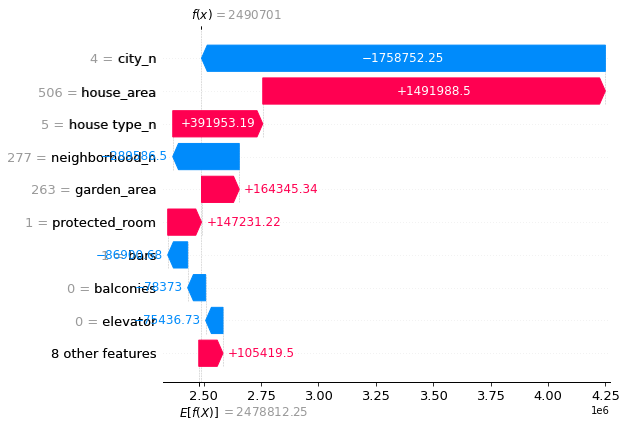

In [34]:
import shap
explainer = shap.Explainer(gb_reg)
shap_values = explainer(x_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

### What are SHAP vaules?

SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value

The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

lets look on summarize the effects of all the features

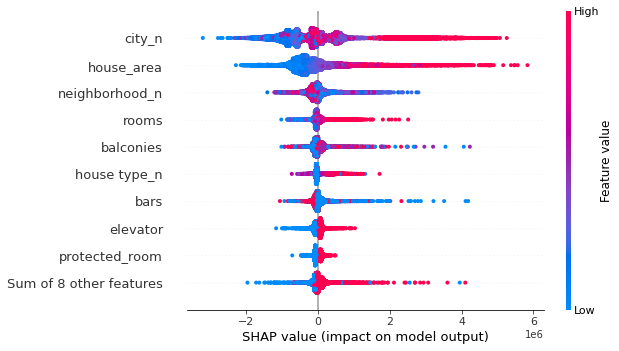

In [185]:
shap.plots.beeswarm(shap_values)

The plot above sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low). This reveals for example that a high LSTAT (% lower status of the population) lowers the predicted home price.

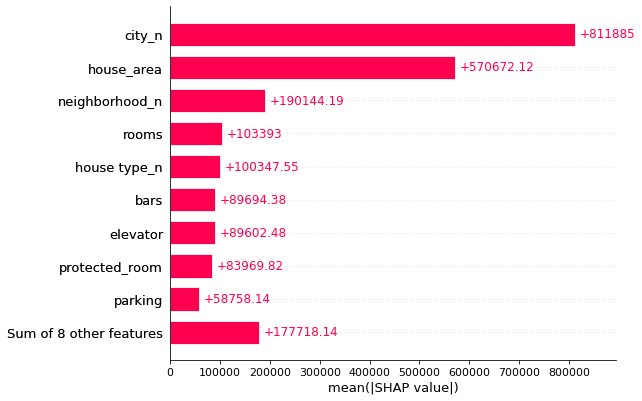

In [36]:
shap.plots.bar(shap_values)

# Summary and Final Taughts


Thoughts for the future:
The options we thought were going to be (later in the project) are:
Set up our data set to use data extraction from several different sites on some devices and the level of reliability of the model.
Why can I visit the protection of some of the major sites on how much I can gather that information through a web crawler.
Learn more algorithms that we can compare the results of on our computers and see if we can improve our features.
Investigate if the person has additional metrics which we can compare the sex to our products.
The model we built that predicts the value of the apartment (from this), we can build another model instead based on the model we built it predicts the value of the apartment several years


The project was very enjoyable for us. It was interesting to choose research questions with a real need in the field we are connected to and explore the field. We encountered a lot of challenges that we faced individually and together during the work and learned a lot from them.
As part of the project, in addition to learning a variety of algorithms and tools in the field of data science, we had to exercise judgment and creativity in order to choose which direction to proceed in the project and which tools are most suitable for the project. That is, not everything was known in advance, and we really liked to create our own way and move on to the next step each time.
We are very happy that we chose at the beginning of the project to experiment with building a web crawler and did not choose a ready-made data set. This construction was challenging, instructive and interesting.
(Happiness) As part of screenings for an army unit dealing with artificial intelligence and big data I was asked to present a project I did in the field and through the workshop I was able to tell about the current project and the many things I learned through it.
We very much appreciate your intention in King of the Road, on the lines of thought she presented to us in the lectures and on the possibility of creating an interesting, instructive and enjoyable project in the data science workshop as part of the degree.
